In [1]:
import instagram_scraper
import json

CPU times: user 51 ms, sys: 4.76 ms, total: 55.8 ms
Wall time: 2.96 s


100%|##########| 154/154 [00:03<00:00, 38.55it/s]


In [2]:
args = json.load(open("instagram_login.json"))

In [3]:
from pprint import pprint
import instagram_scraper


insta_scraper = instagram_scraper.InstagramScraper(**args)
insta_scraper.authenticate_with_login()
shared_data = insta_scraper.get_shared_data_userinfo(username='still_lifes_matter')

arr = []

In [4]:
%%time
for item in insta_scraper.query_media_gen(shared_data):
    arr.append(item)

In [5]:
def get_thumbnail_by_size(record, size):
    for thumbnail_record in record['thumbnail_resources']:
        if thumbnail_record['config_width'] == size:
            return thumbnail_record['src']

In [6]:
def get_image_metadata(record, thumbnail_size=240):
    return {
        "description": record['edge_media_to_caption']['edges'][0]['node']['text'],
        "image_url": record['display_url'],
        "thumbnail_url": get_thumbnail_by_size(record, thumbnail_size),
        "tags": record["tags"]
    }

In [7]:
description = arr[0]['edge_media_to_caption']['edges'][0]['node']['text']

In [8]:
description

"A round, voluminous object in the form of a bearded man's crock placed in a diagonal beam of light is chosen to form the centre of a composition which seeks to perform a dangerous balancing act, its excess weight having to be neutralised over the rest of the painting. \n\nA second eye-catching item, a precious nautilus beaker, is placed on the one visible corner of the table, reflecting the white of the table cloth and standing out starkly against the dark, neutral background of the upper right-hand corner. The oval and circular shapes of the plates with simple foodstuffs echo and inter-link the shapes of the main objects. A fluted glass, flanked to the right by a step glass, provide the top of a triangle in the composition. The salt cellar and an overturned berkemeier wineglass fill the lower left corner of the tableau.\nA second connecting line runs between three objects: a knife with a blocked handle, to the left on a plate, refers to its dark black knife-case, the down-hanging top

from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


In [9]:
metadata = [get_image_metadata(rec) for rec in arr]

In [10]:
record = metadata[0]

In [11]:
record

{'description': "A round, voluminous object in the form of a bearded man's crock placed in a diagonal beam of light is chosen to form the centre of a composition which seeks to perform a dangerous balancing act, its excess weight having to be neutralised over the rest of the painting. \n\nA second eye-catching item, a precious nautilus beaker, is placed on the one visible corner of the table, reflecting the white of the table cloth and standing out starkly against the dark, neutral background of the upper right-hand corner. The oval and circular shapes of the plates with simple foodstuffs echo and inter-link the shapes of the main objects. A fluted glass, flanked to the right by a step glass, provide the top of a triangle in the composition. The salt cellar and an overturned berkemeier wineglass fill the lower left corner of the tableau.\nA second connecting line runs between three objects: a knife with a blocked handle, to the left on a plate, refers to its dark black knife-case, the 

In [12]:
texts = [rec['description'] for rec in metadata]

In [13]:
texts[:5]

["A round, voluminous object in the form of a bearded man's crock placed in a diagonal beam of light is chosen to form the centre of a composition which seeks to perform a dangerous balancing act, its excess weight having to be neutralised over the rest of the painting. \n\nA second eye-catching item, a precious nautilus beaker, is placed on the one visible corner of the table, reflecting the white of the table cloth and standing out starkly against the dark, neutral background of the upper right-hand corner. The oval and circular shapes of the plates with simple foodstuffs echo and inter-link the shapes of the main objects. A fluted glass, flanked to the right by a step glass, provide the top of a triangle in the composition. The salt cellar and an overturned berkemeier wineglass fill the lower left corner of the tableau.\nA second connecting line runs between three objects: a knife with a blocked handle, to the left on a plate, refers to its dark black knife-case, the down-hanging to

In [16]:
import skimage.io
from PIL import Image

url = metadata[0]['thumbnail_url']
#url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.fromarray(skimage.io.imread(url))

In [17]:
import numpy as np

In [18]:
np.array(image).shape

(240, 240, 3)

In [72]:
texts[:2]

["A round, voluminous object in the form of a bearded man's crock placed in a diagonal beam of light is chosen to form the centre of a composition which seeks to perform a dangerous balancing act, its excess weight having to be neutralised over the rest of the painting. \n\nA second eye-catching item, a precious nautilus beaker, is placed on the one visible corner of the table, reflecting the white of the table cloth and standing out starkly against the dark, neutral background of the upper right-hand corner. The oval and circular shapes of the plates with simple foodstuffs echo and inter-link the shapes of the main objects. A fluted glass, flanked to the right by a step glass, provide the top of a triangle in the composition. The salt cellar and an overturned berkemeier wineglass fill the lower left corner of the tableau.\nA second connecting line runs between three objects: a knife with a blocked handle, to the left on a plate, refers to its dark black knife-case, the down-hanging to

In [59]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("clip-ViT-B-16")

In [41]:
import requests
import tqdm

In [52]:
def get_image_from_record(record, field="thumbnail_url"):
    return Image.fromarray(skimage.io.imread(record[field]))

In [53]:
images = [get_image_from_record(record) for record in tqdm.tqdm(metadata)]

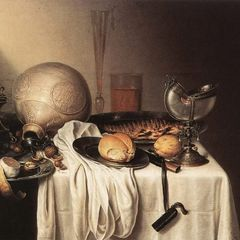

In [60]:
images[0]

In [68]:
model.encode(images[:2]).shape

(2, 512)

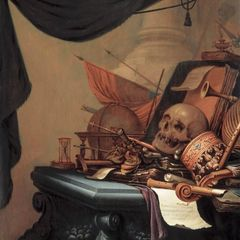

In [71]:
images[1]